In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ConvNet import ConvLayer, ConvNet, FlattenLayer, DenseLayer, PoolLayer
from keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# train_shuffle = np.random.permutation(len(X_train)).reshape(-1, 1)
# X_train = X_train[train_shuffle]
# Y_train = Y_train[train_shuffle]

X_train = X_train.reshape(-1, 1, 28, 28) / 255.0
X_test  = X_test.reshape(-1, 1, 28, 28)  / 255.0
Y_train = tf.keras.utils.to_categorical(Y_train).T
Y_test  = tf.keras.utils.to_categorical(Y_test).T

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 1, 28, 28), (10000, 1, 28, 28), (10, 60000), (10, 10000))

In [3]:
net = ConvNet()
net.add(ConvLayer(num_filters =  8, filter_size = 3, stride = 1, mode = 'valid'))
net.add(ConvLayer(num_filters = 16, filter_size = 3, stride = 1, mode = 'valid'))
net.add(ConvLayer(num_filters = 32, filter_size = 3, stride = 1, mode = 'valid'))
net.add(PoolLayer(filter_size =  2, stride = 2, mode = 'avg'))
net.add(FlattenLayer())
net.add(DenseLayer(num_units = 128, activation = 'relu'))
net.add(DenseLayer(num_units =  64, activation = 'relu'))
net.add(DenseLayer(num_units =  10, activation = 'softmax'))
hist_loss, hist_acc = net.fit(X_train[:6016], Y_train[:, :6016], num_epochs = 10, learning_rate = 0.05)

[Epoch  1/10] - [=============================>] - loss: 1.0195 - train_accuracy: 0.7229
[Epoch  2/10] - [=============================>] - loss: 0.3447 - train_accuracy: 0.9008
[Epoch  3/10] - [=============================>] - loss: 0.2755 - train_accuracy: 0.9257
[Epoch  4/10] - [=============================>] - loss: 0.2384 - train_accuracy: 0.9345
[Epoch  5/10] - [=============================>] - loss: 0.2104 - train_accuracy: 0.9441
[Epoch  6/10] - [=============================>] - loss: 0.1907 - train_accuracy: 0.9495
[Epoch  7/10] - [=============================>] - loss: 0.1738 - train_accuracy: 0.9523
[Epoch  8/10] - [=============================>] - loss: 0.1612 - train_accuracy: 0.9573
[Epoch  9/10] - [=============================>] - loss: 0.1526 - train_accuracy: 0.9604
[Epoch 10/10] - [=============================>] - loss: 0.1426 - train_accuracy: 0.9636


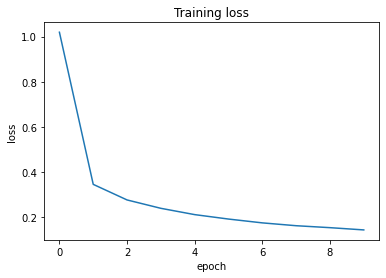

In [4]:
plt.plot(hist_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.show()

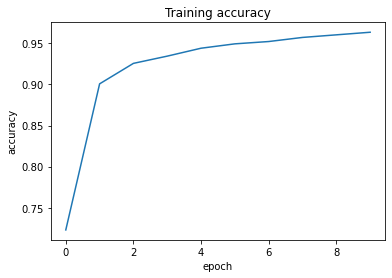

In [5]:
plt.plot(hist_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training accuracy')
plt.show()

In [6]:
test_loss, test_acc = net.evaluate(X_test, Y_test)
print('test_loss: {:.4f} - test_accuracy: {:.4f}'.format(test_loss, test_acc))

[Epoch 1/1] - [=============================>] - loss: 0.3301 - train_accuracy: 0.9100
test_loss: 0.2108 - test_accuracy: 0.9339


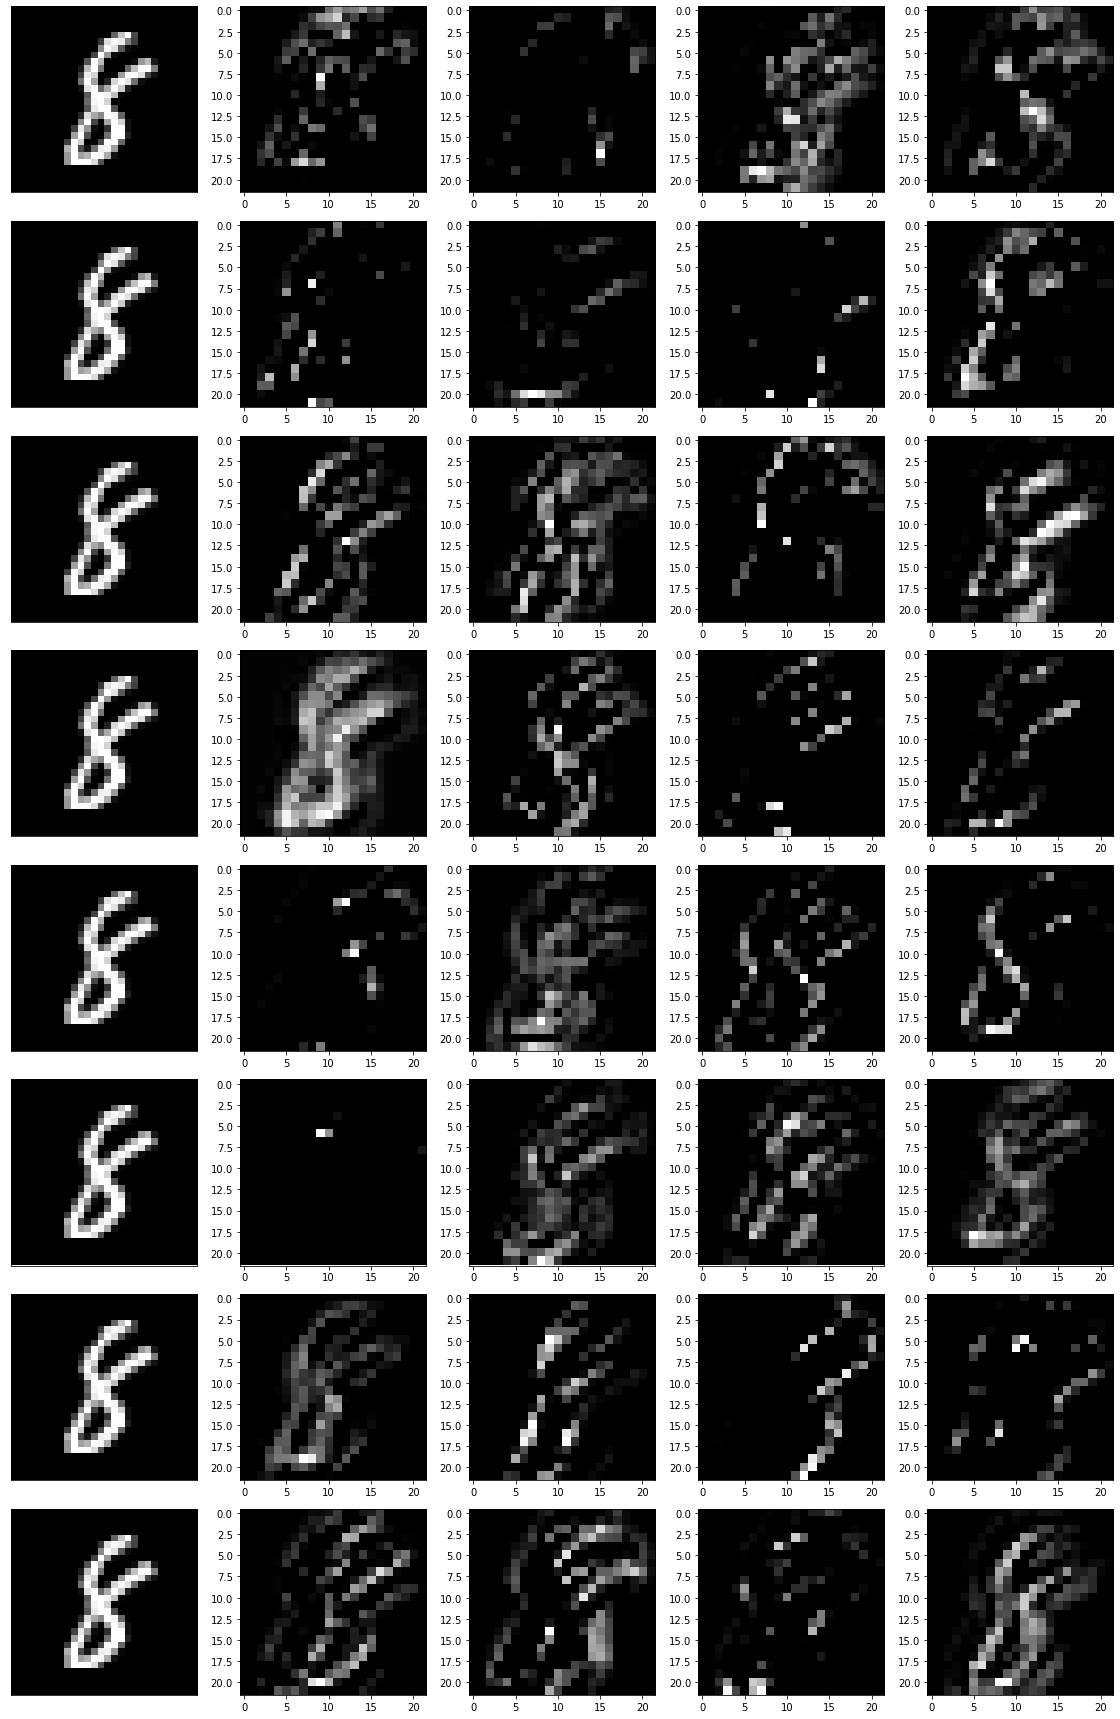

In [11]:
idx = 0

input_batch = net.layers[0].input_batch[idx]
activation  = net.layers[2].a_out[idx]

fig, ax = plt.subplots(8, 5)
fig.set_size_inches((16, 24))

for i in range(8):
    ax[i, 0].imshow(input_batch[0], cmap = 'gray')
    ax[i, 0].get_xaxis().set_visible(False)
    ax[i, 0].get_yaxis().set_visible(False)
    for j in range(4):
        ax[i, 1 + j].imshow(activation[i * 4 + j], cmap = 'gray')
        
plt.tight_layout()
plt.show()